<a href="https://colab.research.google.com/github/daljit3/python-colab-notebooks/blob/main/Capstone-DaljitSingh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Part 1: Business and Data Understanding

I have choosen a dataset related to red variant of a Portuguese wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality.


In [174]:
## Load required basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
## Importing data from a local CSV file

df = pd.read_csv('wine-data.csv')

original_df = df.copy(deep=True)

# Let's have a quick look at the data

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [176]:
print(f'Inference: The Dataset consists of {df.shape[1]} features & {df.shape[0]} samples.')

Inference: The Dataset consists of 13 features & 1143 samples.


In [177]:
# Check the datatypes and to see if there are any empty values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [178]:
print("\n\nInference: The data doesn't have any empty values.\n\n")



Inference: The data doesn't have any empty values.




In [179]:
# Check the stats

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [180]:
# The target variable feature is 'quality'. Let's explore it further.

print(f"The unique ranks in 'quality' in our dataset are {df['quality'].unique()}")

The unique ranks in 'quality' in our dataset are [5 6 7 4 8 3]


In [181]:
# Let's check value count distribution

value_count=df['quality'].value_counts().sort_values()

value_count

3      6
8     16
4     33
7    143
6    462
5    483
Name: quality, dtype: int64

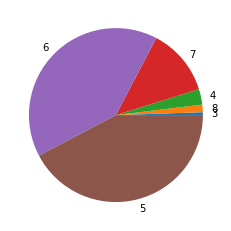

In [182]:
pie_labels = value_count.index.to_list()

#features = list(df.columns.values)[0:11] # exclude id, quality

plt.pie(pie_data, labels=pie_labels)
plt.show()

### Q. Define the problem domain

Our dataset is related to red variant of a Portuguese wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The challenge is to predict the quality of the wine. However, the output variable seems to be imbalanced as it has higher number of mediocre range wines than low and high quality wines. 

### Q. Identify candidate questions for your machine learning project

As per data exploration above, we are trying to predict quality of a wine based upon input variables (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol). 

The output variable determines the quality of the wine which is a score from 0 to 10. It also appears that there isn't enough data in this dataset and the given dataset is imbalanced.


### Q. Generate a descriptive statistics report for the columns in your dataset

In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


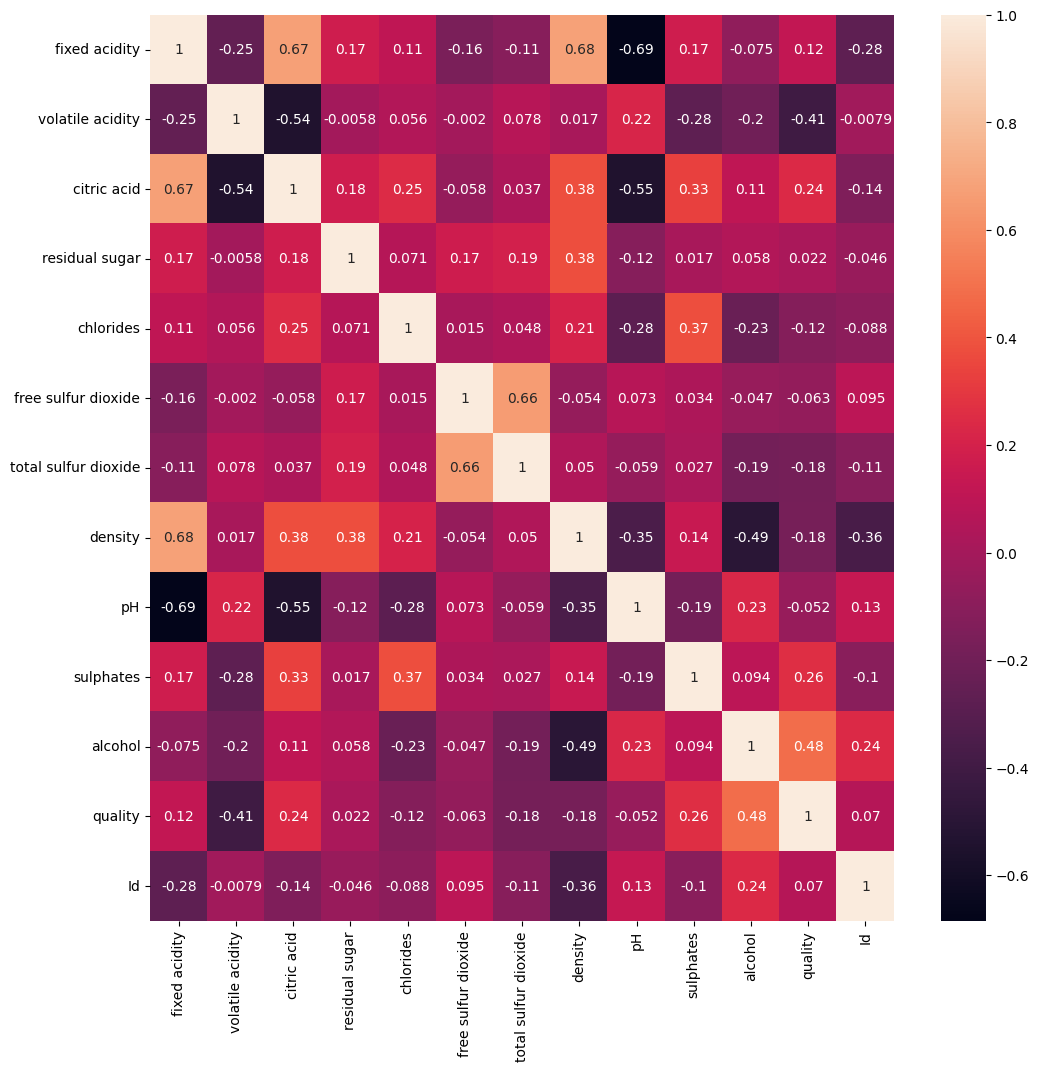

In [184]:
# Let see the correlation among features

plt.figure(figsize=(12, 12), dpi=100)

x = df.corr()
sns.heatmap(x, annot=True)
plt.show()

In [185]:
print("Inference: This feature's correlation plot seems to show strong multicollinearity in this dataset.")

Inference: This feature's correlation plot seems to show strong multicollinearity in this dataset.


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [186]:
counter = 0
r,c = df.shape

df1 = df.copy(deep=True)
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\nInference: The dataset doesn\'t have any duplicates')
else:
    print(f'\nInference: Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [187]:
## Let set the ID as the index
df1.set_index('Id', inplace = True)

## Just trying to see if I split the data into
temp_ratings = []
for i in df1['quality']:
    if i >= 3 and i <= 4:
        temp_ratings.append(1)
    elif i >= 5 and i <= 6:
        temp_ratings.append(2)
    elif i >= 7 and i <= 8:
        temp_ratings.append(3)

df1['ratings'] = temp_ratings

df1.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ratings
Id,,,,,,,,,,,,,
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [188]:
from sklearn.model_selection import train_test_split

y = df1.loc[:,['quality']]

x = df1.iloc[:, 0:11]

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=31)


In [189]:
# Let's normalise the our data and get zscore to apply assumptions


zmean = xtrain.describe().T['mean']
zstd = xtrain.describe().T['std']

xtrain_norm = (xtrain-zmean)/zstd
xtest_norm = (xtest-zmean)/zstd

# it's a good idea to see what our data looks like now

xtrain_norm.head()
# xtest_norm.head()
#ytrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
755,-0.289455,2.159375,-1.015112,-0.462110,-0.632590,0.616409,0.038025,-0.776106,1.266823,-1.339173,0.264922
376,1.820655,-0.437780,1.176731,0.355066,-0.188770,0.325598,0.038025,1.878786,-0.317052,2.669897,0.541336
660,-0.631636,-0.042561,-1.015112,-0.833554,-0.277534,-1.031521,-0.794988,0.301622,0.063078,0.901189,-0.748597
552,0.680055,-0.381321,-0.148569,0.132200,0.121905,-0.159087,-0.054532,0.669627,-1.204022,0.488491,-0.380044
993,-0.688666,-1.058839,0.055323,-0.387822,-0.100005,1.488843,0.685925,0.112363,0.886693,-1.044389,-0.932873


In [190]:
ytrain.head()

,quality
Id,
755,6
376,6
660,6
552,6
993,5


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
all_accuracies = []
all_csv = []

# Checking RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model_one = RandomForestClassifier()
model_one.fit(xtrain_norm, ytrain['quality'])
ypred = model_one.predict(xtest_norm)
# print(ypred[0:10])
# print(ytest['quality'])

from sklearn.metrics import accuracy_score
accuracy_m1 = accuracy_score(ypred, ytest['quality'])
print(accuracy_m1)

0.6724890829694323


In [192]:
#### KneighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
model_two = KNeighborsClassifier()
model_two.fit(xtrain_norm, ytrain['quality'])
KNeighborsClassifier()
predictions = model_two.predict(xtest_norm)
accuracy_m2 = accuracy_score(predictions, ytest['quality'])
print(accuracy_m2)

0.5589519650655022


In [193]:

print(f"Model 1 CVS: {cross_val_score(model_one, xtrain_norm, ytrain['quality'], cv=5)}")
print(f"Model 2 CVS: {cross_val_score(model_two, xtrain_norm, ytrain['quality'], cv=5)}")


Model 1 CVS: [0.61202186 0.6010929  0.61202186 0.68306011 0.68131868]
Model 2 CVS: [0.57923497 0.51912568 0.57923497 0.51912568 0.56043956]


# Part 4: Model Evaluation

In [201]:
# Let's compare the different

from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

allalgos = {"Stochastic Gradient Descend":SGDClassifier(),
            "Support Vector Machines": SVC(),
            #"Linear SVM": LinearSVC(),
            "Gaussian Naive Bayes'": GaussianNB(),
            "Tree Tree": DecisionTreeClassifier(),
            "RandomForest": RandomForestClassifier(),
            "KNeighbors": KNeighborsClassifier()}
for algoName, model in allalgos.items():
  print('~~~~~~~~~~~~~~~~~~~~~~')
  print(algoName)
  model.fit(xtrain_norm, ytrain['quality'])
  predictions = model.predict(xtest_norm)
  accScore = accuracy_score(ytest['quality'], predictions)
  cvScore = cross_val_score(model, xtrain_norm, ytrain['quality'], cv=5)
  all_accuracies.append([algoName,accScore])
  all_csv.append([algoName, cvScore])
  print(accScore)
  print(cvScore)
  print(f"MSE: {mean_squared_error(ytest['quality'], predictions)}")
  print(f"MAE: {mean_absolute_error(ytest['quality'], predictions)}")


~~~~~~~~~~~~~~~~~~~~~~
Stochastic Gradient Descend
0.5240174672489083
[0.47540984 0.56284153 0.52459016 0.40983607 0.54945055]
MSE: 0.7248908296943232
MAE: 0.5589519650655022
~~~~~~~~~~~~~~~~~~~~~~
Support Vector Machines
0.6419213973799127
[0.53551913 0.58469945 0.6010929  0.63934426 0.67582418]
MSE: 0.4366812227074236
MAE: 0.38427947598253276
~~~~~~~~~~~~~~~~~~~~~~
Gaussian Naive Bayes'
0.537117903930131
[0.49726776 0.56284153 0.52459016 0.52459016 0.57142857]
MSE: 0.7336244541484717
MAE: 0.5502183406113537
~~~~~~~~~~~~~~~~~~~~~~
Tree Tree
0.5633187772925764
[0.54644809 0.51912568 0.56830601 0.54644809 0.54945055]
MSE: 0.6462882096069869
MAE: 0.5065502183406113
~~~~~~~~~~~~~~~~~~~~~~
RandomForest
0.6724890829694323
[0.6284153  0.64480874 0.60655738 0.67213115 0.68681319]
MSE: 0.4192139737991266
MAE: 0.35807860262008734
~~~~~~~~~~~~~~~~~~~~~~
KNeighbors
0.5589519650655022
[0.57923497 0.51912568 0.57923497 0.51912568 0.56043956]
MSE: 0.6200873362445415
MAE: 0.4978165938864629


In [195]:
# Test a model 

new_wine={'fixed acidity': [2], 'volatile acidity': [5],'citric acid':[7],'residual sugar':[2],'chlorides':[9],'free sulfur dioxide':[6],'total sulfur dioxide':[5],'density':[2],'pH':[5],'sulphates':[4],'alcohol':[6]}
new_wine = pd.DataFrame(new_wine)  

new_wine_predict1 = model_one.predict(new_wine)
print(f"The quality of the new wine is predicted to be (model 1): {new_wine_predict1}")

new_wine_predict2 = model_two.predict(new_wine)
print(f"The quality of the new wine is predicted to be (model 2): {new_wine_predict2}")


The quality of the new wine is predicted to be (model 1): [6]
The quality of the new wine is predicted to be (model 2): [5]


### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [196]:
import pickle

# This will generate model_one.pkl 'model' file - This file can be uploaded and registered as an external model in the Azure portal. It can be consumed as a server as per code below.

pickle.dump(model_one, open('model_one.pkl', 'wb'))

In [197]:
# Once our model has been registered in the Azure Portal, we are able to test it using this code below 
 
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    'fixed acidity': [2], 
    'volatile acidity': [5],
    'citric acid':[7],
    'residual sugar':[2],
    'chlorides':[9],
    'free sulfur dioxide':[6],
    'total sulfur dioxide':[5],
    'density':[2],
    'pH':[5],
    'sulphates':[4],
    'alcohol':[6]
    }

body = str.encode(json.dumps(data))

url = 'http://5ee6e107-61cc-4ea1-a4a5-067e059f829a.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Fri, 21 Jan 2022 14:02:38 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 9ed3ca3a-888b-4aeb-8e04-6f970b0fcea9
X-Ms-Run-Fn-Exec-Ms: 0.481
X-Ms-Run-Function-Failed: False
Connection: close


{'status_code': 400, 'message': 'Missing parameter in body: data'}


### **Balancing:** Let's try another technique to fix the imbalance.

Original class distribution:
5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Class distribution after applying SMOTE Technique:
7    483
5    483
3    483
8    483
6    483
4    483
Name: quality, dtype: int64



Inference: The set of dataset after cleanup has 2898 samples & 12 columns.


Original set  --->  (2898, 11) (2898,) 
Training set  --->  (2318, 11) (2318,) 
Testing set   --->  (580, 11)  (580,)


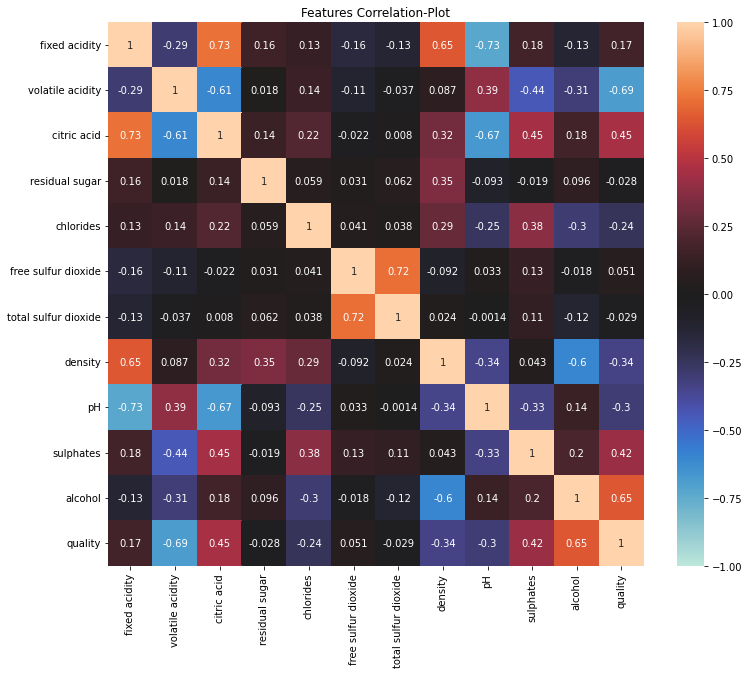

In [198]:
#Fixing the imbalance using SMOTE Technique

from imblearn.over_sampling import SMOTE

df10 = original_df.copy(deep=True)
df10.drop_duplicates(inplace=True)
df10.reset_index(drop=True,inplace=True)
df10.set_index('Id', inplace=True)

print('Original class distribution:')
print(original_df['quality'].value_counts())

xf = df10.columns
X = df10.drop(['quality'],axis=1)
Y = df10['quality']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df10 = pd.DataFrame(X, columns=xf)
df10['quality'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

print(f'\n\n\nInference: The set of dataset after cleanup has {df10.shape[0]} samples & {df10.shape[1]} columns.\n\n')


Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

### Normalise data

zmean = Train_X.describe().T['mean']
zstd = Train_X.describe().T['std']
Train_X_norm = (Train_X-zmean)/zstd
Test_X_norm = (Test_X-zmean)/zstd

#Checking the correlation

features = df10.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df10[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

# Now in the next code block, we will evaluate this new test data

In [199]:

# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model_three = RandomForestClassifier()
model_three.fit(Train_X_norm, Train_Y)
ypred = model_three.predict(Test_X_norm)
# print(ypred[0:10])
# print(ytest['quality'])

from sklearn.metrics import accuracy_score
accuracy_m3 = accuracy_score(ypred, Test_Y)
print(f"The accuracy score using model 3 is {accuracy_m3}")

import pickle
pickle.dump(model_three, open('model_three.pkl', 'wb')) # Again, we can save this model file for external use.

The accuracy score using model 3 is 0.8482758620689655


### Conclusions

It seems like we are able to get much higher accuracy score after balancing our dataset. 
In both my experiments above, RandomForestClassifier model seemed to performed better compared to others.